# Warsaw - clustering the postcodes

In [97]:
import pandas as pd
import numpy as np
import requests
import json
import time
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



In [16]:
data = pd.read_csv('data_fill_drop.csv', index_col=0).reset_index(drop=True)

In [17]:
data.head()

,Postcode,Borough,Street,Latitude,Longitude
0,01-355,Bemowo,os. Przyjaźń,52.2374,20.9164
1,01-362,Bemowo,pl. Kasztelański,52.2317,20.9159
2,01-483,Bemowo,ul. A. B. Dobrowolskiego,52.2577,20.8922
3,01-464,Bemowo,ul. A. Bożka,52.2424,20.9160
4,01-480,Bemowo,ul. A. Einsteina,52.2541,20.8921


In [18]:
len(data)

3732

In [23]:
data['Latitude'] = data['Latitude'].astype(str)
data['Longitude'] = data['Longitude'].astype(str)

In [24]:
data['Coordinates'] = data[['Latitude', 'Longitude']].apply(lambda x: ', '.join(x), axis=1)

In [25]:
data.head()

,Postcode,Borough,Street,Latitude,Longitude,Coordinates
0,01-355,Bemowo,os. Przyjaźń,52.2374,20.9164,"52.2374, 20.9164"
1,01-362,Bemowo,pl. Kasztelański,52.2317,20.9159,"52.2317, 20.9159"
2,01-483,Bemowo,ul. A. B. Dobrowolskiego,52.2577,20.8922,"52.2577, 20.8922"
3,01-464,Bemowo,ul. A. Bożka,52.2424,20.916,"52.2424, 20.916"
4,01-480,Bemowo,ul. A. Einsteina,52.2541,20.8921,"52.2541, 20.8921"


In [30]:
X = data[['Latitude', 'Longitude']].rename_axis('X').values
X

array([['52.2374', '20.9164'],
       ['52.2317', '20.9159'],
       ['52.2577', '20.8922'],
       ...,
       ['52.2651', '20.9743'],
       ['52.2628', '20.9689'],
       ['52.2608', '20.9667']], dtype=object)

In [47]:
Z = linkage(X, method='average')
Z

array([[3.68100000e+03, 3.72000000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.95900000e+03, 1.96000000e+03, 1.00000000e-04, 2.00000000e+00],
       [1.17400000e+03, 1.28600000e+03, 1.00000000e-04, 2.00000000e+00],
       ...,
       [7.45700000e+03, 7.45900000e+03, 1.12670720e-01, 3.05500000e+03],
       [7.45400000e+03, 7.46000000e+03, 1.21439916e-01, 3.21800000e+03],
       [7.45600000e+03, 7.46100000e+03, 1.75564260e-01, 3.73200000e+03]])

In [48]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.7458974319174326

In [46]:
for i in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    
    Z = linkage(X, method=i)
    
    c, coph_dists = cophenet(Z, pdist(X))
    print(('Method {} gives the value if c = {}').format(i, c))

Method single gives the value if c = 0.531808857794349
Method complete gives the value if c = 0.5903994965256966
Method average gives the value if c = 0.7458974319174326
Method weighted gives the value if c = 0.6116246714644082
Method centroid gives the value if c = 0.7262321008302773
Method median gives the value if c = 0.6593694485244128
Method ward gives the value if c = 0.7231694518105686


In [50]:
Z[:20]

array([[3.68100000e+03, 3.72000000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.95900000e+03, 1.96000000e+03, 1.00000000e-04, 2.00000000e+00],
       [1.17400000e+03, 1.28600000e+03, 1.00000000e-04, 2.00000000e+00],
       [3.67400000e+03, 3.69800000e+03, 1.00000000e-04, 2.00000000e+00],
       [1.04000000e+03, 1.34100000e+03, 1.00000000e-04, 2.00000000e+00],
       [5.85000000e+02, 6.69000000e+02, 1.00000000e-04, 2.00000000e+00],
       [3.67300000e+03, 3.73500000e+03, 1.20710678e-04, 3.00000000e+00],
       [1.42000000e+03, 1.44400000e+03, 1.41421356e-04, 2.00000000e+00],
       [2.17400000e+03, 2.17500000e+03, 1.41421356e-04, 2.00000000e+00],
       [1.18700000e+03, 1.18800000e+03, 1.41421356e-04, 2.00000000e+00],
       [3.35000000e+03, 3.35100000e+03, 2.00000000e-04, 2.00000000e+00],
       [3.59600000e+03, 3.65500000e+03, 2.00000000e-04, 2.00000000e+00],
       [2.17200000e+03, 2.17300000e+03, 2.00000000e-04, 2.00000000e+00],
       [1.94800000e+03, 2.07800000e+03, 2.00000000e

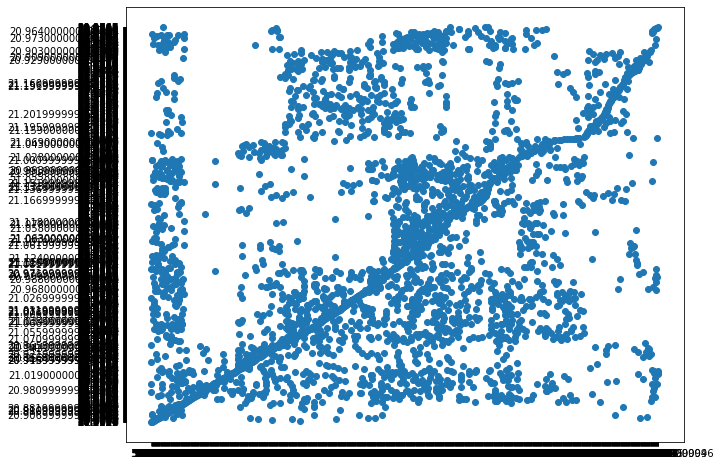

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.show()

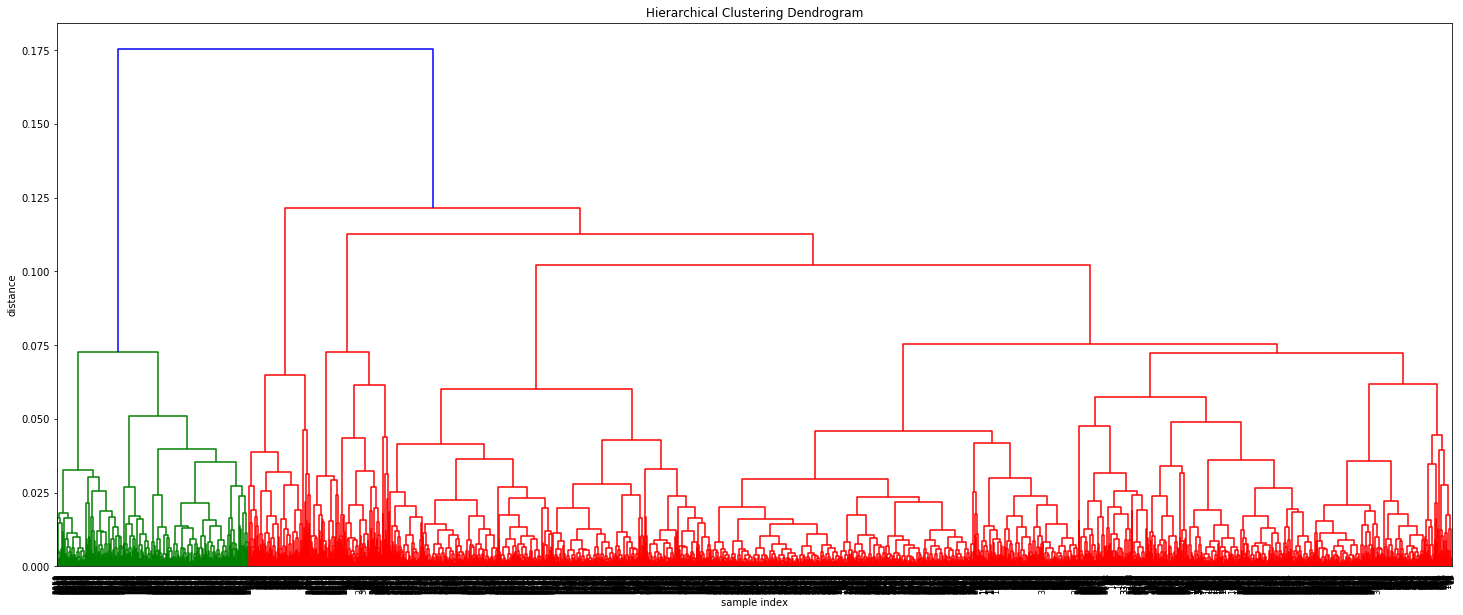

In [53]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


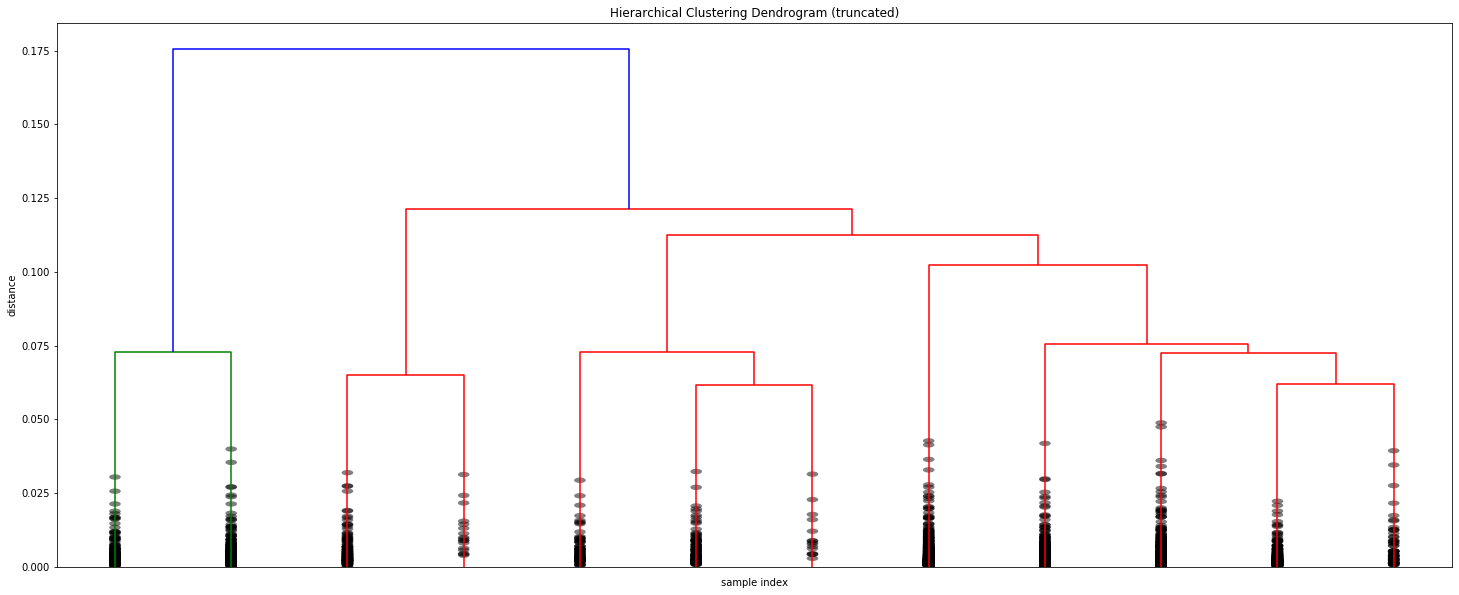

In [71]:
plt.figure(figsize=(25, 10))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

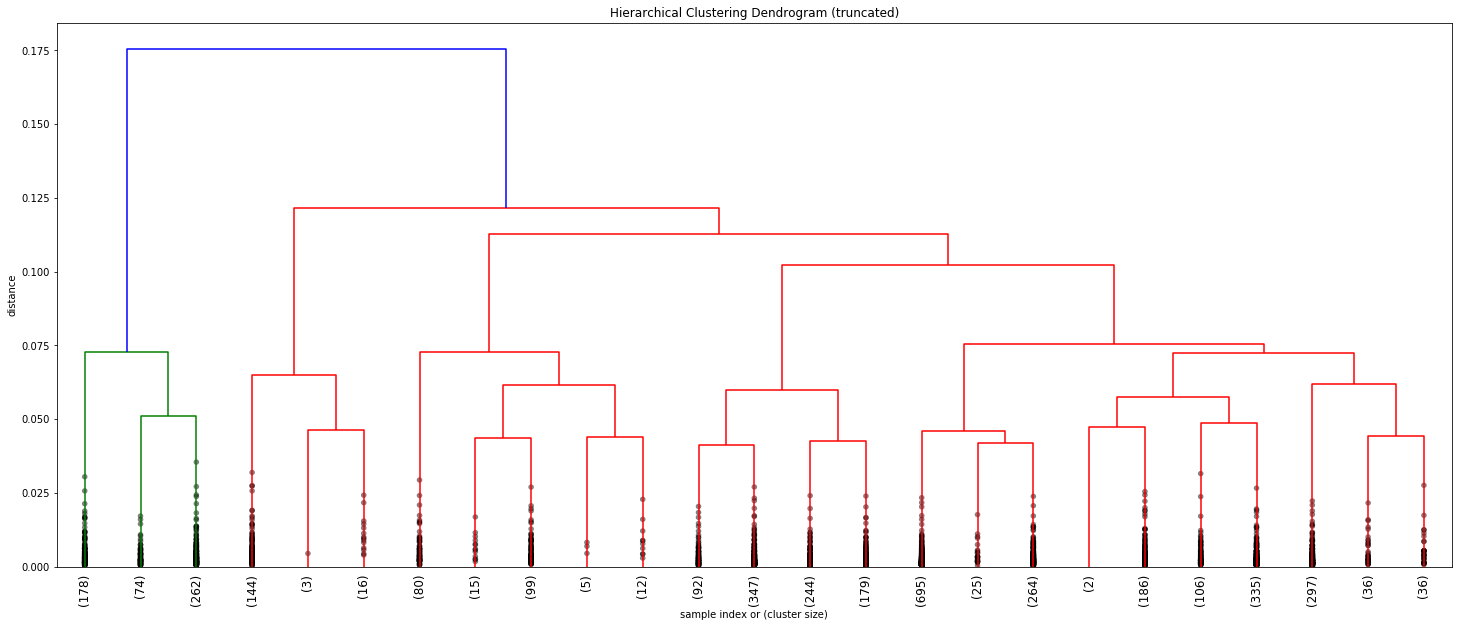

In [76]:
plt.figure(figsize=(25, 10))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

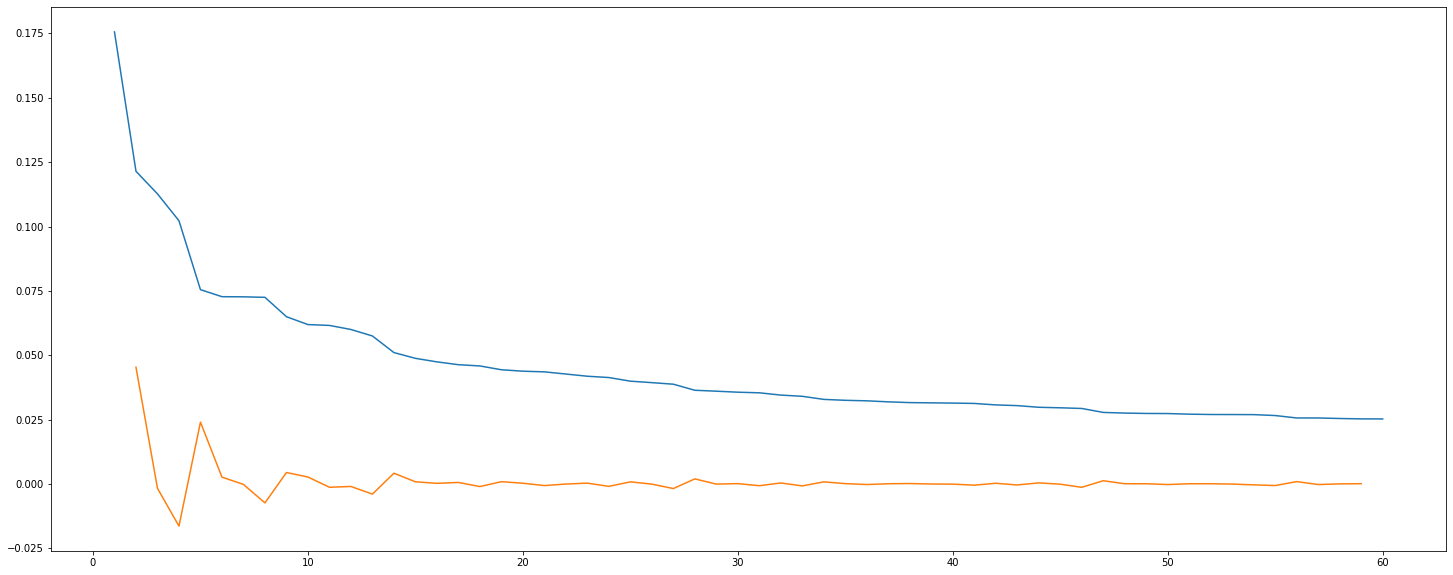

clusters: 2


In [74]:
plt.figure(figsize=(25, 10))

last = Z[-60:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [77]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.025
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([47, 47, 61, ..., 55, 55, 55], dtype=int32)

In [78]:
len(clusters)

3732

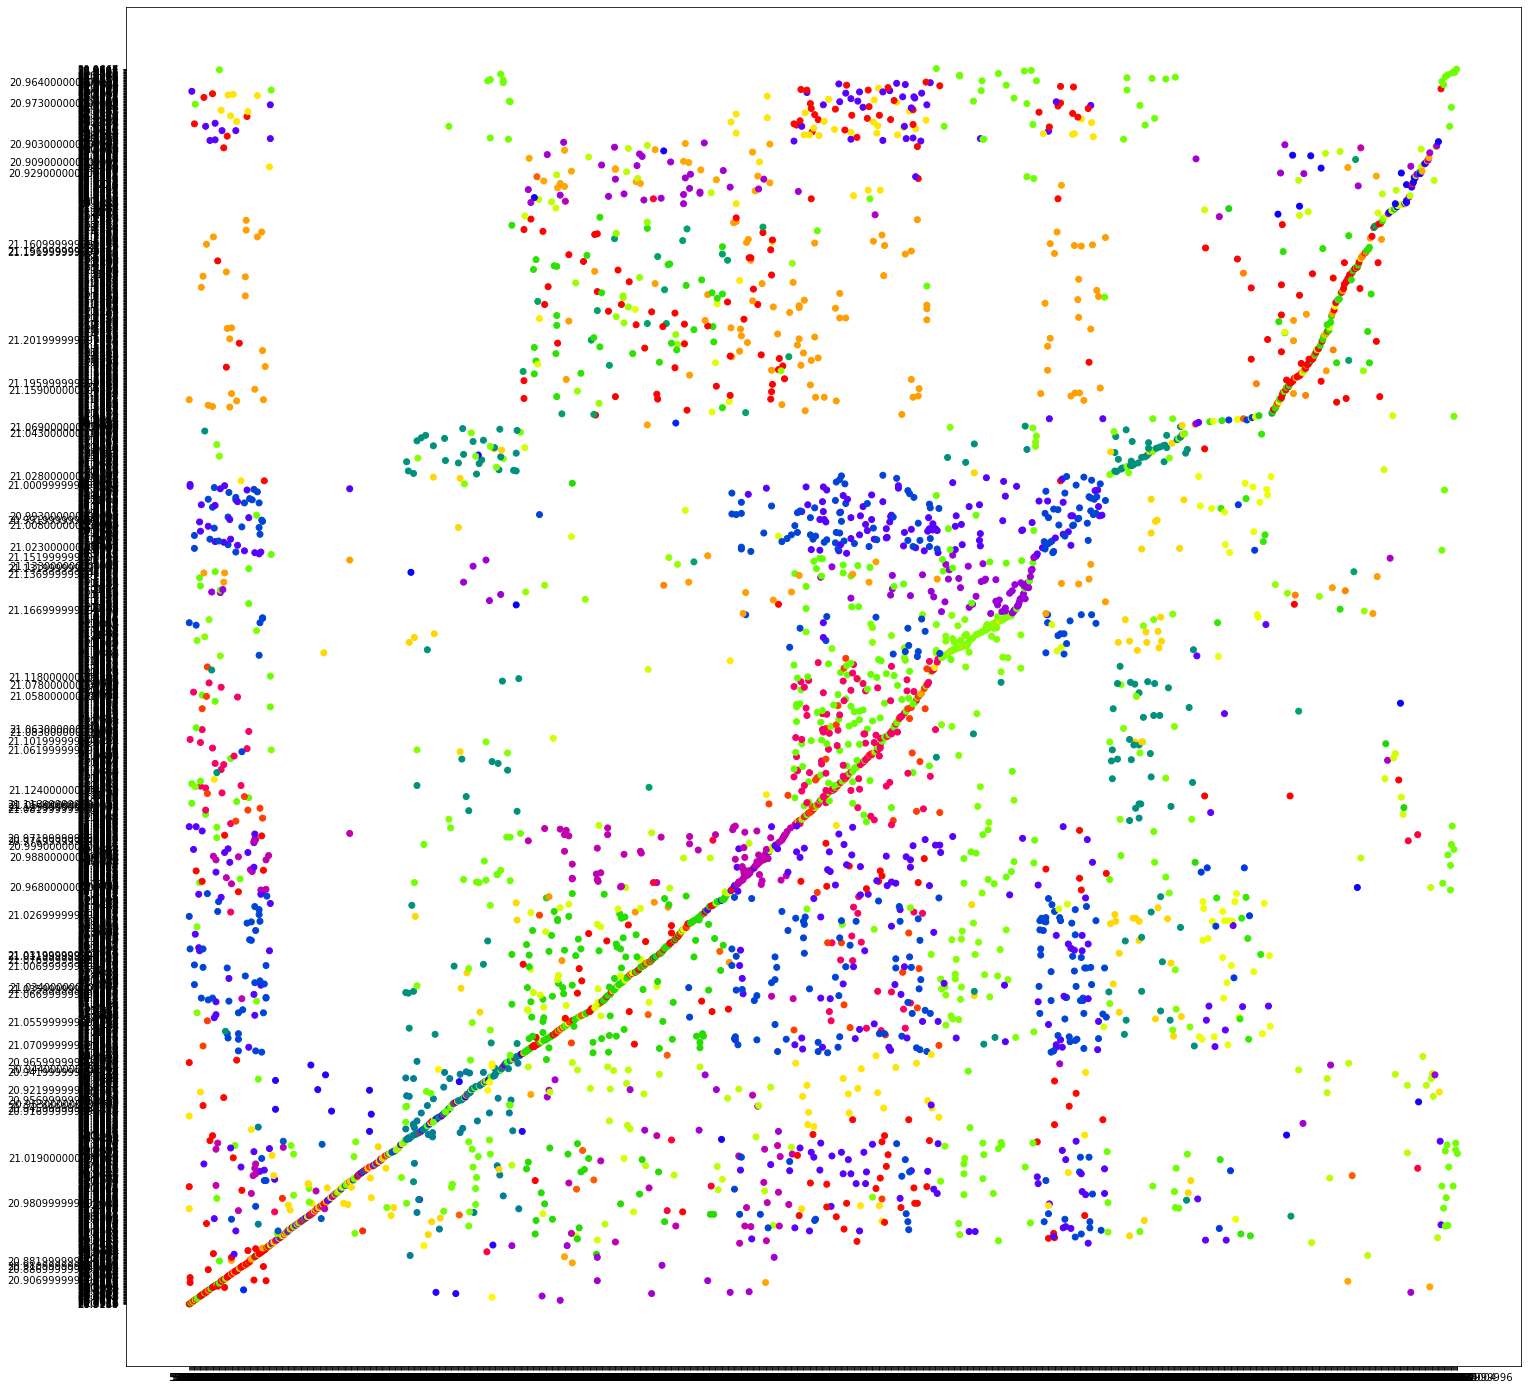

In [80]:
plt.figure(figsize=(25, 25))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [81]:
data['Clusters'] = clusters

In [93]:
kclusters = len(data.groupby('Clusters').count())
kclusters

61

In [94]:
from geopy.geocoders import Nominatim

address = 'Pałac Kultury, Warszawa'

geolocator = Nominatim(user_agent="warsaw")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of center of Warsaw are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of center of Warsaw are 52.2317641, 21.005799675616117.


In [101]:
# create map of Warsaw using latitude and longitude values
map_warsaw_clustered = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, postcode, cluster in zip(data['Latitude'], data['Longitude'], data['Postcode'], data['Clusters']):
    #label = postcode
    label = folium.Popup(str(postcode) + ' Cluster ' + str(cluster), parse_html=True)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7,).add_to(map_warsaw_clustered)  

#map_warsaw_clustered    
map_warsaw_clustered.save('warsaw_clustered.html')

In [ ]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters